<a href="https://colab.research.google.com/github/Madhumitha-Murali/Handwritten-Character-Recognition-Hindi-Alphabet-/blob/master/HW2_redone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Code source: https://medium.com/@krishna.ramesh.tx/training-a-cnn-to-distinguish-between-mnist-digits-using-pytorch-620f06aa9ffa

In [2]:
#Importing the required libraries
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
#Import requests to get an image from the internet to test our model
#Image module from the PIL library to test for different images
#Copy library in order to copy our model later on
import requests
from PIL import Image
from io import BytesIO

import copy

In [4]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [5]:
#Hyper-parameter batch size is set
numb_batch = 64 

In [6]:
#Getting the MNIST dataset

T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
#Creating the LeNet
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

In [8]:
#Validating the model by seeing how many handwritten digit images are predicted right out of the total number of images
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

In [9]:
#default hyper-parameters set:
#epochs=3
#learning rate=0.001
#loss function: cross entropy
#Optimizer: Adam
#Noting down the accuracy in each epoch after vadlidating to plot the graph of the model performance
#We only store and save the best model with the most accuracy

def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

In [10]:
#Now we check if a GPU is available. If so, then we can use it. If not, then we must resort to using the CPU
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

Saving Best Model with Accuracy:  95.30999755859375
Epoch: 1 Accuracy : 95.30999755859375 %
Saving Best Model with Accuracy:  97.18000030517578
Epoch: 2 Accuracy : 97.18000030517578 %
Saving Best Model with Accuracy:  97.83000183105469
Epoch: 3 Accuracy : 97.83000183105469 %
Saving Best Model with Accuracy:  98.19999694824219
Epoch: 4 Accuracy : 98.19999694824219 %
Epoch: 5 Accuracy : 98.02999877929688 %
Saving Best Model with Accuracy:  98.41000366210938
Epoch: 6 Accuracy : 98.41000366210938 %
Saving Best Model with Accuracy:  98.5999984741211
Epoch: 7 Accuracy : 98.5999984741211 %
Saving Best Model with Accuracy:  98.62999725341797
Epoch: 8 Accuracy : 98.62999725341797 %
Epoch: 9 Accuracy : 98.4800033569336 %
Saving Best Model with Accuracy:  98.69999694824219
Epoch: 10 Accuracy : 98.69999694824219 %
Saving Best Model with Accuracy:  98.81999969482422
Epoch: 11 Accuracy : 98.81999969482422 %
Epoch: 12 Accuracy : 98.76000213623047 %
Epoch: 13 Accuracy : 98.81999969482422 %
Epoch: 14 A

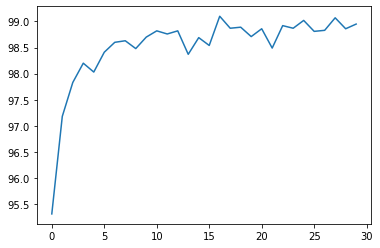

In [11]:
#Training with 30 epochs

lenet = train(30, device=device)

In [12]:
#Saving the model
torch.save(lenet.state_dict(), "lenet.pth")

In [14]:
#Function for testing the prediction of the model after training
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [15]:
y_pred, y_true = predict_dl(lenet, val_dl)

In [16]:
#Plotting the confusion matrix
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,976,0,0,0,0,0,2,1,1,0
1,0,1133,1,0,0,0,0,0,1,0
2,1,0,1025,1,1,0,0,3,1,0
3,0,0,3,1002,0,3,0,2,0,0
4,0,1,1,0,975,0,3,0,0,2
5,0,0,0,8,0,880,2,0,0,2
6,3,2,1,0,1,3,947,0,1,0
7,0,2,5,0,0,0,0,1018,0,3
8,1,0,3,3,0,1,1,2,961,2
9,0,0,0,1,9,3,0,3,0,993


In [17]:
def inference(path, model, device):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f).convert(mode="L")
        img = img.resize((28, 28))
        x = (255 - np.expand_dims(np.array(img), -1))/255.
    with torch.no_grad():
        pred = model(torch.unsqueeze(T(x), axis=0).float().to(device))
        return F.softmax(pred, dim=-1).cpu().numpy()

In [26]:
#path = "https://previews.123rf.com/images/aroas/aroas1704/aroas170400068/79321959-handwritten-sketch-black-number-8-on-white-background.jpg"
path = "https://i.pinimg.com/236x/b3/56/bc/b356bc93a2f9c621c28d439f0b2041ba.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f).convert(mode="L")
    img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.

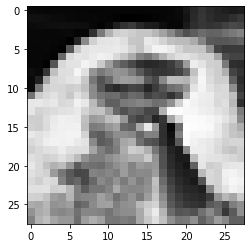

In [27]:
#The external image for testing
plt.imshow(x.squeeze(-1), cmap="gray")

In [28]:
pred = inference(path, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")

Predicted: 0, Prob: 98.5555648803711 %


In [29]:
pred

array([[9.8555565e-01, 1.2509787e-11, 2.6312753e-06, 1.2562597e-05,
        1.3347668e-08, 6.6391641e-07, 7.0046959e-04, 8.6286756e-09,
        1.3724369e-02, 3.6656154e-06]], dtype=float32)